In [2]:
import numpy as np
import pandas as pd
import scipy.sparse 
import multiprocessing as mp
import glob
import re
import time, timeit
import matplotlib.pyplot as plt
import sys
import random
sys.path.insert(1, '../src/mf_algorithms')

from functions import *

# Iteration Tests (vary niter)

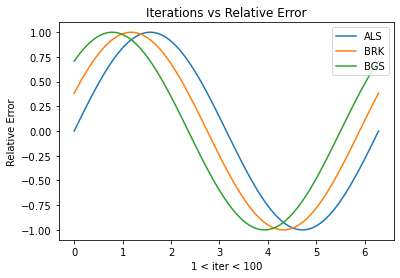

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='ALS') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BRK') # add another Line2D
line3, = ax.plot(x, np.sin(x+2*np.pi/8), label='BGS')

ax.set_xlabel('1 < iter < 100')
ax.set_ylabel('Relative Error')
ax.set_title('Iterations vs Relative Error')
ax.legend(loc='upper right')

plt.show()

# Subiteration Tests (vary siter)

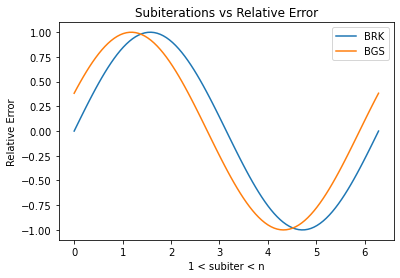

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('1 < subiter < n')
ax.set_ylabel('Relative Error')
ax.set_title('Subiterations vs Relative Error')
ax.legend()

plt.show()

# Sampling Tests (vary k, matrix dim 200)

### BRK

In [ ]:
bfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
bweight200 = np.random.randint(0, 2, size=(4, 200))
b200 = np.matmul(bfactor200, bweight200)
np.count_nonzero(b200 == 0) / (b200.shape[0]*b200.shape[1])

In [ ]:
%%time
i = 2
while(i <= 10):
    fname = "Errors/BRK/sbrk" + str(i) + "err200.txt"
    brkmp(b200, k = 4, s = i, niter = 100, kacziter = 1000, filename = fname, loop = 15)
    i = i + 2

### BGS

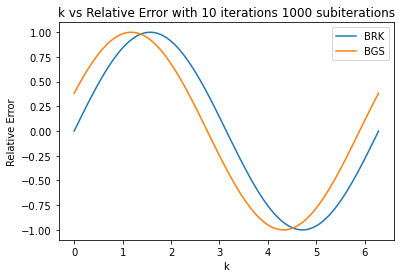

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('k')
ax.set_ylabel('Relative Error')
ax.set_title('k vs Relative Error with 10 iterations 1000 subiterations')
ax.legend()

plt.show()

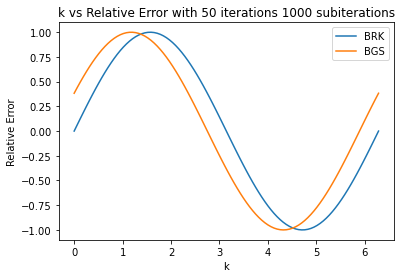

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('k')
ax.set_ylabel('Relative Error')
ax.set_title('k vs Relative Error with 50 iterations 1000 subiterations')
ax.legend()

plt.show()

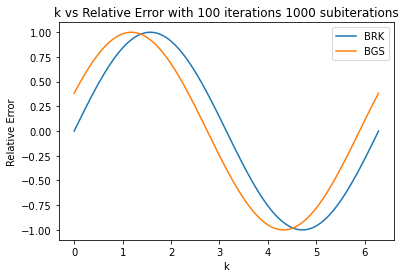

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('k')
ax.set_ylabel('Relative Error')
ax.set_title('k vs Relative Error with 100 iterations 1000 subiterations')
ax.legend()

plt.show()

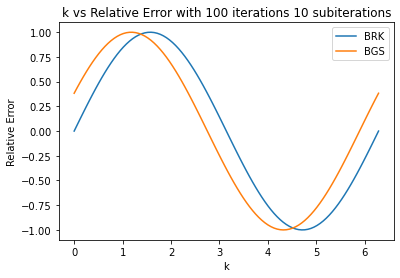

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('k')
ax.set_ylabel('Relative Error')
ax.set_title('k vs Relative Error with 100 iterations 10 subiterations')
ax.legend()

plt.show()

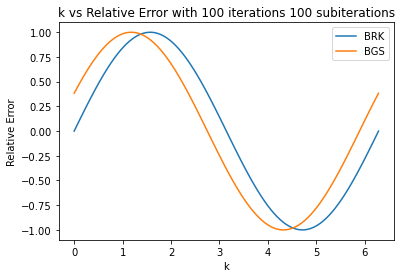

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('k')
ax.set_ylabel('Relative Error')
ax.set_title('k vs Relative Error with 100 iterations 100 subiterations')
ax.legend()

plt.show()

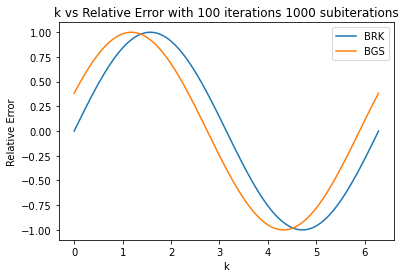

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('k')
ax.set_ylabel('Relative Error')
ax.set_title('k vs Relative Error with 100 iterations 1000 subiterations')
ax.legend()

plt.show()

# Computational Time

### BRK

In [ ]:
setup = '''
from functions import brktest
import numpy as np

bfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
bweight200 = np.random.randint(0, 2, size=(4, 200))
b200 = np.matmul(bfactor200, bweight200)
'''

In [ ]:
with open('Errors/comptime/brktime.txt', 'w') as f:
    for i in np.arange(200):
        testcode = "brktest(b200, k = 4, s = " + str(i + 1) + ", niter = 100, kacziter = 1000)"
        #testcode = "np.matmul(np.random.randint(5, size = 1000), np.random.randint(5, size = 1000))"
        time = timeit.timeit(stmt = testcode, setup = setup, number = 3) / 3
        f.write(str(time) + ', ')

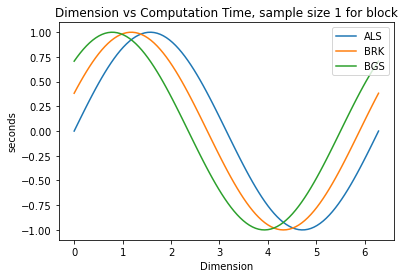

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='ALS') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BRK') # add another Line2D
line3, = ax.plot(x, np.sin(x+2*np.pi/8), label='BGS')

ax.set_xlabel('Dimension')
ax.set_ylabel('seconds')
ax.set_title('Dimension vs Computation Time, sample size 1 for block')
ax.legend(loc='upper right')

plt.show()

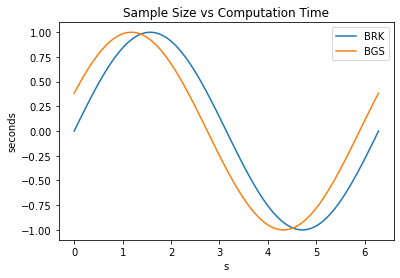

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 100)

line1, = ax.plot(x, np.sin(x), label='BRK') # add Line2D in ax.lines
line2, = ax.plot(x, np.sin(x+np.pi/8), label='BGS') # add another Line2D

ax.set_xlabel('s')
ax.set_ylabel('seconds')
ax.set_title('Sample Size vs Computation Time')
ax.legend(loc='upper right')

plt.show()